# TITLE

**GROUP 03 _ DATA102 S13**

Members:
- Bacar, Jedrek Jua Rephael A.
- De Silva, Wayne FLossien T.
- Llenado, Lexandra Mitchelle D.

## INTRODUCTION

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam sit amet turpis aliquam, semper est nec, rhoncus lorem. Vivamus ornare leo at sapien maximus maximus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur magna magna, feugiat ut ornare ac, bibendum id nulla. Donec euismod mollis sapien, in fringilla ex accumsan id. Nulla ut finibus neque, sit amet vehicula enim. Donec magna nisl, commodo vitae tristique at, egestas nec eros. Donec bibendum mattis lacus, nec luctus tellus faucibus eget. Phasellus porttitor ligula nec efficitur finibus. Donec volutpat convallis purus nec mollis.

Etiam placerat laoreet nunc, ac vulputate quam. Ut convallis metus nisl, quis ornare quam elementum ac. Vestibulum tincidunt ipsum ipsum, sit amet posuere mauris sagittis semper. Morbi et aliquet quam. Fusce non placerat eros, sit amet facilisis mi. Cras justo arcu, suscipit vitae commodo eget, finibus et elit. Curabitur et ligula hendrerit, tempor mauris nec, cursus magna. Donec finibus nisl sed orci ultricies pellentesque.

## IMPORTING LIBRARIES

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## THE DATASET

This dataset contains detailed information about movies listed on IMDb, including titles, genres, release dates, and ratings. It also includes user reviews and ratings, making it an excellent resource for sentiment analysis and trend analysis in the movie industry. This dataset can be used to gain insights into movie trends, audience preferences, and the correlation between movie attributes and ratings.

In [3]:
df = pd.read_csv('IMDb_Dataset.csv')
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


## DATA PREPROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [7]:
df.shape

(3173, 10)

In [9]:
df.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Poster-src             object
Duration (minutes)    float64
dtype: object

### Handling Missing Values

In [11]:
# Counting the missing values in the data
df.isna().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64

We will not drop any null values as there are none present.

### Handling Duplicate Values

In [13]:
# Check if there are duplicates
df.duplicated().sum()

411

In [15]:
# Drop duplicates
df.drop_duplicates(keep='first')

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0
...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,Francis Ford CoppolaMario Puzo,90.0,https://m.media-amazon.com/images/M/MV5BMWMwMG...,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,https://m.media-amazon.com/images/M/MV5BMWU4N2...,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,https://m.media-amazon.com/images/M/MV5BMTMxNT...,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...,175.0


### Drop Unnecessary Columns

In [17]:
# Drop columns that are not needed for the analysis
df = df.drop(['Certificates', 'Director','Star Cast','Poster-src','Duration (minutes)'], axis=1)

In [19]:
df.head()

,Title,IMDb Rating,Year,Genre,MetaScore
0,End of the Spear,6.8,2005,Adventure,45.0
1,Elvira Madigan,7.0,1967,Biography,66.0
2,The Kid Stays in the Picture,7.3,2002,Documentary,75.0
3,It Ain't Over,8.2,2022,Documentary,79.0
4,Mahler,7.0,1974,Biography,66.0


### One-Hot Encoding

In [46]:
df_encoded = pd.get_dummies(df, columns=['Genre'])
df_encoded

,Title,IMDb Rating,Year,MetaScore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi
0,End of the Spear,6.8,2005,45.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Elvira Madigan,7.0,1967,66.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Kid Stays in the Picture,7.3,2002,75.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,It Ain't Over,8.2,2022,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mahler,7.0,1974,66.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,The Lord of the Rings: The Return of the King,9.0,2003,94.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3169,Schindler's List,9.0,1993,95.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3170,The Dark Knight,9.0,2008,84.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3171,The Godfather,9.2,1972,100.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## EXPLORATORY DATA ANALYSIS

In [21]:
df.describe()

,IMDb Rating,Year,MetaScore
count,3173.000000,3173.000000,3173.000000
mean,6.931012,2004.958399,65.993066
std,0.805202,16.819985,11.358619
min,3.900000,1917.000000,20.000000
25%,6.400000,1997.000000,64.000000
50%,6.900000,2010.000000,66.000000
75%,7.500000,2017.000000,69.000000
max,9.500000,2025.000000,100.000000


Text(0, 0.5, 'Frequency')

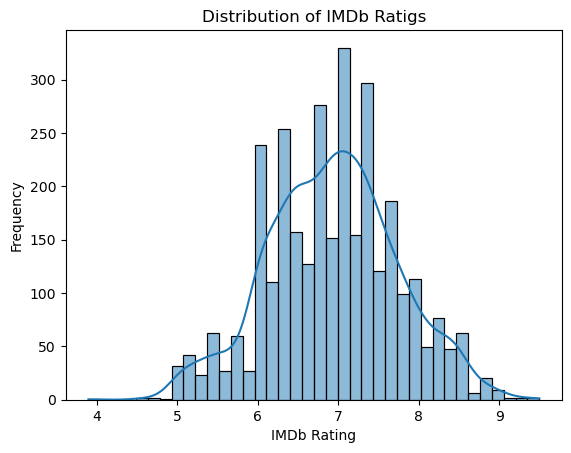

In [31]:
# IMDb Rating Distribution
sns.histplot(df['IMDb Rating'], kde=True)
plt.title('Distribution of IMDb Ratigs')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

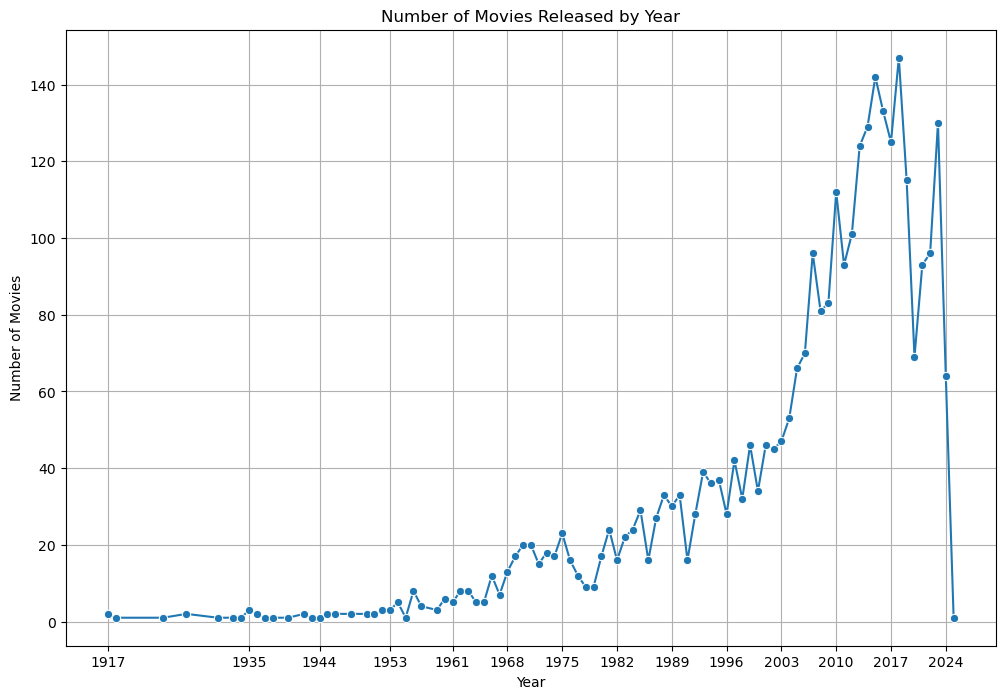

In [25]:
# Counting the number of movies released each year
year_counts = df['Year'].value_counts().sort_index()

# Creating 12 labels to see better the year
labels = max(1, len(year_counts) // 12)
x_ticks = year_counts.index[::labels]

# Creating the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

# Set the title and labels
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set the X-axis labels
plt.xticks(ticks=x_ticks, rotation=0)

# Enable the grid
plt.grid(True)

# Show the plot
plt.show()

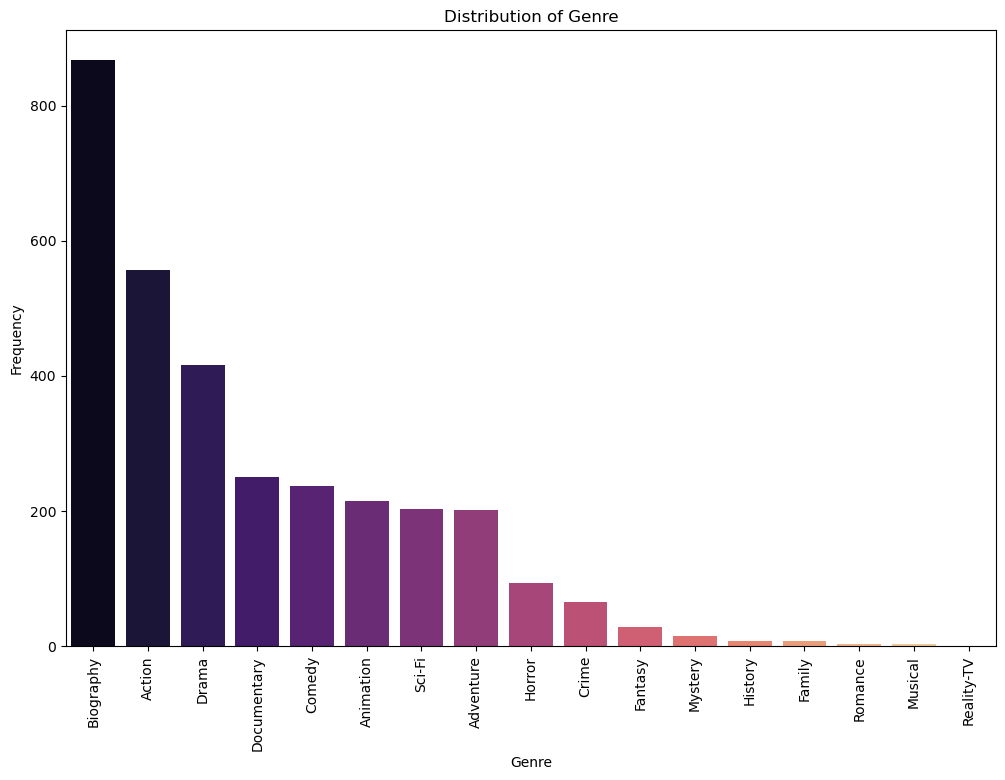

In [27]:
# Counting the number of movies released each year
genre_counts = df['Genre'].value_counts()

# Create a bar chart for Distribution of Genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Sort by MetaScore from highest to lowest
df_sortedmeta = df.sort_values(by='MetaScore', ascending=False)

df_sortedmeta

,Title,IMDb Rating,Year,Genre,MetaScore
694,Lawrence of Arabia,8.3,1962,Adventure,100.0
3123,Rear Window,8.5,1954,Mystery,100.0
3122,Casablanca,8.5,1942,Drama,100.0
3171,The Godfather,9.2,1972,Crime,100.0
3078,Lawrence of Arabia,8.3,1962,Adventure,100.0
...,...,...,...,...,...
74,Modigliani,7.2,2004,Biography,25.0
2008,Maximum Overdrive,5.4,1986,Action,24.0
2336,One Man's Hero,6.0,1999,Action,24.0
1999,Hansel & Gretel: Witch Hunters,6.1,2013,Action,23.0


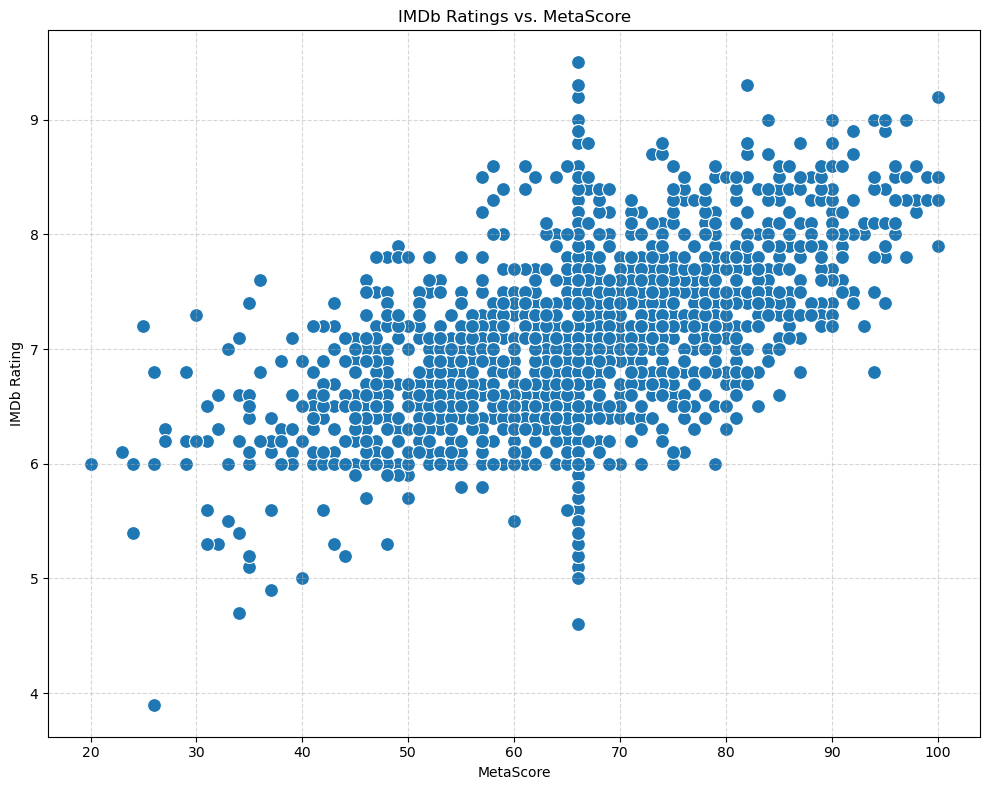

In [37]:
# Create the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='MetaScore', y='IMDb Rating', 
                s=100,)

# Set plot title and labels
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')


# Show gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

#### UNIQUE IDENTIFIER 

In [63]:
df2_num = df2.copy()

df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [65]:
# Create a LabelEncoder instance for 'Genre'
le_genre = LabelEncoder()

# Create a LabelEncoder instance for 'Certificates'
le_certificates = LabelEncoder()

# Fit the LabelEncoder instances to the original dataset
le_genre.fit(df2_num['Genre'])
le_certificates.fit(df2_num['Certificates'])

# Transform the 'Genre' and 'Certificates' columns of the new dataset
df2_num['Genre'] = le_genre.transform(df2_num['Genre'])
df2_num['Certificates'] = le_certificates.transform(df2_num['Certificates'])

df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,5,6,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,5,3,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,5,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,0,5,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,6,0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,8,5,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [67]:
# Create a dictionary to map numerical values to genre names
genre_dict = dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_)))
certificate_dict = dict(zip(le_certificates.classes_, le_certificates.transform(le_certificates.classes_)))

print("Genre Mapping:")
for genre, code in genre_dict.items():
    print(f"{genre}: {code}")

print("Certificate Mapping:")
for certificate, code in certificate_dict.items():
    print(f"{certificate}: {code}")

Genre Mapping:
Action: 0
Adventure: 1
Animation: 2
Biography: 3
Comedy: 4
Crime: 5
Documentary: 6
Drama: 7
Family: 8
Fantasy: 9
History: 10
Horror: 11
Musical: 12
Mystery: 13
Reality-TV: 14
Romance: 15
Sci-Fi: 16
Certificate Mapping:
Approved: 0
G: 1
M/PG: 2
NC-17: 3
Not Rated: 4
PG: 5
PG-13: 6
Passed: 7
R: 8
TV-14: 9
TV-G: 10
TV-MA: 11
TV-PG: 12
TV-Y7: 13
Unrated: 14
X: 15


In [71]:
df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,5,6,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,5,3,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,5,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,0,5,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,6,0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,8,5,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [73]:
df = df2_num.drop(columns=['Title', 'Director', 'Star Cast'])
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


In [77]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

3     0.245836
0     0.174511
7     0.146271
6     0.085083
4     0.083273
16    0.073497
2     0.062998
1     0.060463
11    0.022810
5     0.022448
9     0.009413
13    0.005431
10    0.002534
8     0.002534
15    0.001448
12    0.001086
14    0.000362
Name: Genre, dtype: float64


In [79]:
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 46


In [81]:
df = df.drop_duplicates(keep=False)
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


In [83]:
duplicates = df[df.duplicated()]
duplicates

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)


In [85]:
# Count occurrences of each category
category_counts = df['Genre'].value_counts()

# Get the top 10 categories with the highest number of samples
top_10_categories = category_counts.head(10).index

# Filter the DataFrame to keep only the top 10 categories
df = df[df['Genre'].isin(top_10_categories)]
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


In [87]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

3     0.259457
0     0.177302
7     0.148261
6     0.089797
4     0.086358
2     0.065724
1     0.063814
16    0.061521
11    0.024073
5     0.023691
Name: Genre, dtype: float64


## CLUSTERING

### Choosing optimal number of clusters

In [50]:
# Check for numerical and categorical columns
df_encoded

,Title,IMDb Rating,Year,MetaScore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi
0,End of the Spear,6.8,2005,45.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Elvira Madigan,7.0,1967,66.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Kid Stays in the Picture,7.3,2002,75.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,It Ain't Over,8.2,2022,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mahler,7.0,1974,66.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,The Lord of the Rings: The Return of the King,9.0,2003,94.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3169,Schindler's List,9.0,1993,95.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3170,The Dark Knight,9.0,2008,84.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3171,The Godfather,9.2,1972,100.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Drop the categorical columns since this can't be scaled
df_cluster = df_encoded.drop('Title', axis=1)
df_cluster

,IMDb Rating,Year,MetaScore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi
0,6.8,2005,45.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,1967,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.3,2002,75.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,8.2,2022,79.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,7.0,1974,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,9.0,2003,94.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3169,9.0,1993,95.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3170,9.0,2008,84.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3171,9.2,1972,100.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [56]:
scaler = MinMaxScaler()

scaled_vals = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(scaled_vals, columns=df_cluster.columns)
df_scaled

,IMDb Rating,Year,MetaScore,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi
0,0.517857,0.814815,0.3125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.553571,0.462963,0.5750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.607143,0.787037,0.6875,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.767857,0.972222,0.7375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.553571,0.527778,0.5750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,0.910714,0.796296,0.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3169,0.910714,0.703704,0.9375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3170,0.910714,0.842593,0.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3171,0.946429,0.509259,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
sum_of_squared_errors = []
silhouette = []
chi = []
dbi = []

X = df_scaled
k_list = range(2, 15)
for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X)
    sum_of_squared_errors.append(km.inertia_)

    labels = km.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))
    chi.append(calinski_harabasz_score(X, labels))
    dbi.append(davies_bouldin_score(X, labels))

/Users/lelexabd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lelexabd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lelexabd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lelexabd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

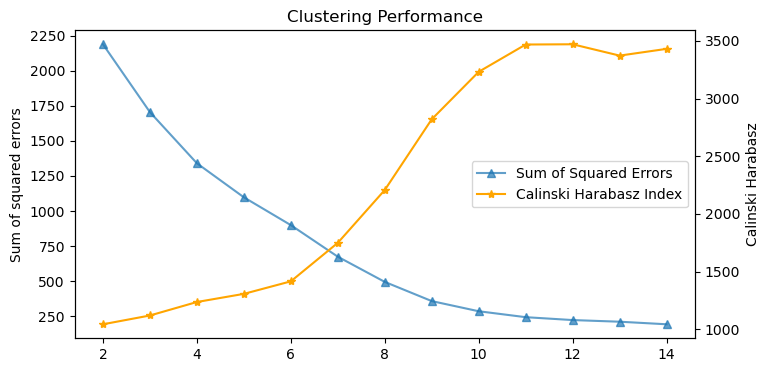

In [60]:
# For this graph, let's show Sum of Squared Error and Calinski Harabasz metrics.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, '^-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
# plt.title('Elbow Method For Optimal k')
# ax.legend(loc=1)
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Calinski Harabasz')
ax2.grid(False)
lns2 = ax2.plot(k_list, chi, '*-', color='orange', label='Calinski Harabasz Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

As shown in the graph, identifying the point of the sum of squared error was challenging because the elbow was not clearly defined. However, the Calinski-Harabasz Index exhibited a high score at point 2, indicating a strong cluster separation at that point.

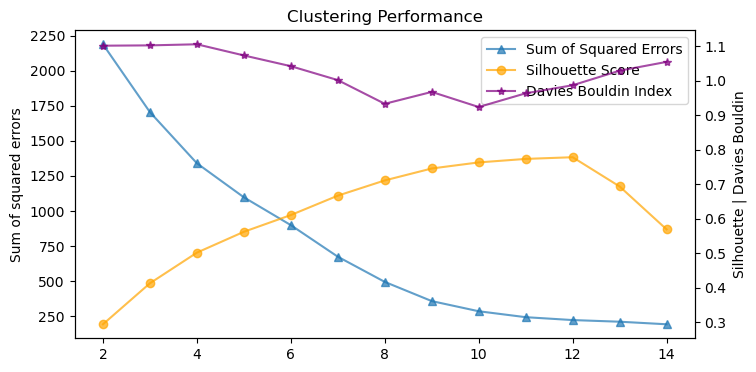

In [62]:
# For this graph, let's show Sum of Squared Error, Silhouette Score, and Davies Bouldin Index metrics.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, '^-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Silhouette | Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
lns3 = ax2.plot(k_list, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

The graph illustrates three metrics. The sum of squared error is depicted as in the previous graph, the Silhouette Score peaks at point 14, and the Davies-Bouldin Index reaches its lowest score at point 14, indicating optimal clustering at this point. The high Silhouette Score at point 14 suggests that the clusters are well-defined and distinct from each other, while the low Davies-Bouldin Index indicates that the clusters are compact and well-separated.

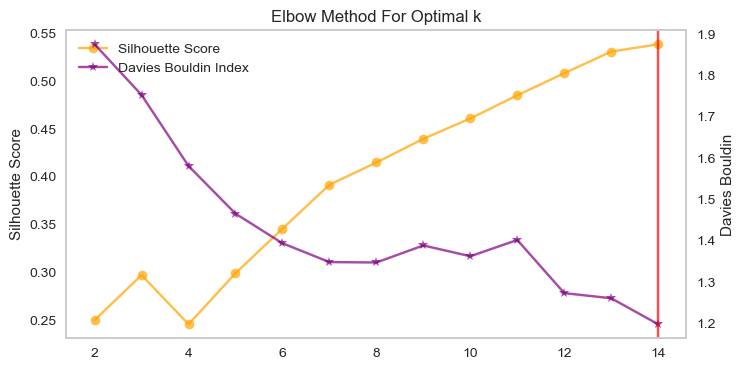

In [175]:
# For now, let's choose the best k using the Silhouette Score metric.

alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
ax.set_ylabel('Silhouette Score')
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.axvline(14, color='red', alpha=alpha)
plt.xlabel('k')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the findings, the optimal number of clusters k is 14. This conclusion is supported by the peak in the Silhouette Score and the lowest value of the Davies-Bouldin Index at k = 14, providing strong evidence for this optimal clustering.

##### Assigning cluster labels

In [187]:
# Cluster using K-means
k = 14
km = KMeans(n_clusters=k, random_state=42)
km.fit(scaled_df3)
labels = km.predict(scaled_df3)

# Create new dataframe with features and labels
labeled_df2 = encoded_df2.copy()
labeled_df2['cluster'] = labels

labeled_df2

/Users/lelexabd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Title,IMDb Rating,Year,Director,Star Cast,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
0,End of the Spear,6.8,2005,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1,Elvira Madigan,7.0,1967,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,The Kid Stays in the Picture,7.3,2002,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0,0,0,0,...,0,1,0,0,0,0,0,0,0,8
3,It Ain't Over,8.2,2022,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Mahler,7.0,1974,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
3167,12 Angry Men,9.0,1957,Sidney Lumet,Reginald Rose,97.0,96.0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3170,The Dark Knight,9.0,2008,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3171,The Godfather,9.2,1972,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0,0,0,0,...,0,1,0,0,0,0,0,0,0,9


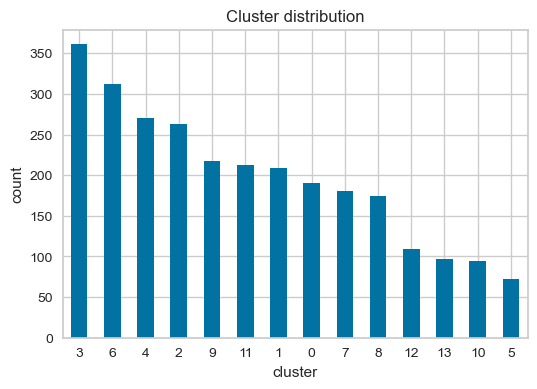

In [193]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=100)
labeled_df2['cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Cluster distribution')
plt.show()

##### Interpreting our clusters

In [196]:
k = 14

for i in range(k):
    print(f'Cluster {i}')
    display(labeled_df2[labeled_df2['cluster']==i].describe())

Cluster 0


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,190.000000,190.000000,190.000000,190.000000,190.0,190.0,190.0,190.0,190.0,190.0,...,190.0,190.000000,190.0,190.0,190.0,190.0,190.0,190.000000,190.0,190.0
mean,6.544737,2004.668421,66.021053,116.140526,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.994737,0.0,0.0,0.0,0.0,0.0,0.005263,0.0,0.0
std,0.859278,16.419776,0.290191,2.198193,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.072548,0.0,0.0,0.0,0.0,0.0,0.072548,0.0,0.0
min,5.000000,1918.000000,66.000000,86.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,5.925000,2000.250000,66.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,6.500000,2009.000000,66.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75%,7.100000,2015.000000,66.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
max,8.600000,2022.000000,70.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


Cluster 1


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,209.000000,209.000000,209.000000,209.000000,209.0,209.0,209.0,209.0,209.0,209.0,...,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0
mean,7.012919,2010.076555,63.062201,119.995215,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.514011,11.910075,12.273759,19.009486,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,1961.000000,26.000000,60.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,6.600000,2005.000000,55.000000,107.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,7.000000,2014.000000,65.000000,118.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,7.400000,2018.000000,71.000000,129.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,8.300000,2024.000000,95.000000,219.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Cluster 2


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.000000,263.000000,...,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0,263.0
mean,6.901141,2009.756654,62.239544,121.922433,0.479087,0.102662,0.053232,0.0,0.064639,0.015209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,0.805870,12.545250,14.024503,22.067938,0.500515,0.304095,0.224924,0.0,0.246356,0.122617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.900000,1960.000000,20.000000,50.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25%,6.400000,2004.500000,53.000000,106.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
50%,6.800000,2013.000000,66.000000,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,7.300000,2019.000000,72.000000,134.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
max,9.000000,2024.000000,94.000000,201.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Cluster 3


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,361.000000,361.000000,361.000000,361.000000,361.0,361.0,361.0,361.0,361.0,361.0,...,361.0,361.000000,361.0,361.0,361.000000,361.0,361.0,361.0,361.0,361.0
mean,6.991967,2004.423823,65.614958,120.384488,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.947368,0.0,0.0,0.002770,0.0,0.0,0.0,0.0,3.0
std,0.560671,15.709706,12.557145,21.327589,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.223607,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0
min,6.000000,1927.000000,25.000000,83.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
25%,6.600000,1996.000000,58.000000,107.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
50%,7.000000,2009.000000,66.000000,118.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
75%,7.300000,2017.000000,74.000000,129.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
max,9.000000,2024.000000,97.000000,260.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,3.0


Cluster 4


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,270.000000,270.000000,270.000000,270.000000,270.0,270.0,270.0,270.0,270.0,270.0,...,270.0,270.000000,270.0,270.0,270.0,270.0,270.0,270.000000,270.0,270.0
mean,6.748148,2001.588889,67.074074,118.718148,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.937037,0.0,0.0,0.0,0.0,0.0,0.011111,0.0,4.0
std,0.883037,20.058406,9.270916,20.702811,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.243347,0.0,0.0,0.0,0.0,0.0,0.105017,0.0,0.0
min,5.000000,1917.000000,33.000000,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.0
25%,6.100000,1995.000000,66.000000,116.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.0
50%,6.700000,2009.000000,66.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.0
75%,7.400000,2016.000000,66.000000,116.825000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.0
max,9.300000,2024.000000,98.000000,317.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,4.0


Cluster 5


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,72.000000,72.000000,72.000000,72.000000,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.000000,72.0,72.0
mean,6.972222,1989.597222,65.625000,115.458333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013889,0.0,5.0
std,0.678694,17.859908,11.966429,27.745797,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117851,0.0,0.0
min,5.600000,1943.000000,34.000000,51.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.0
25%,6.400000,1975.000000,61.750000,99.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.0
50%,6.950000,1988.000000,66.000000,111.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.0
75%,7.400000,2004.250000,70.000000,125.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.0
max,8.500000,2023.000000,100.000000,220.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,5.0


Cluster 6


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,312.000000,312.000000,312.000000,312.000000,312.0,312.0,312.0,312.0,312.0,312.0,...,312.0,312.000000,312.000000,312.000000,312.000000,312.0,312.0,312.0,312.0,312.0
mean,6.780128,2006.108974,63.618590,116.130128,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.961538,0.009615,0.003205,0.006410,0.0,0.0,0.0,0.0,6.0
std,0.811447,15.170446,10.471461,14.951755,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.192617,0.097742,0.056614,0.079935,0.0,0.0,0.0,0.0,0.0
min,5.000000,1951.000000,23.000000,60.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
25%,6.200000,1999.000000,62.750000,110.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
50%,6.800000,2010.000000,66.000000,116.300000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
75%,7.300000,2017.000000,66.000000,118.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
max,8.800000,2025.000000,98.000000,180.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,6.0


Cluster 7


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,180.000000,180.000000,180.000000,180.000000,180.0,180.0,180.0,180.0,180.0,180.0,...,180.000000,180.000000,180.000000,180.0,180.0,180.000000,180.0,180.0,180.000000,180.0
mean,6.655000,2000.011111,66.266667,114.304444,0.0,0.0,0.0,0.0,1.0,0.0,...,0.005556,0.933333,0.005556,0.0,0.0,0.005556,0.0,0.0,0.005556,7.0
std,0.924664,22.311905,7.971738,11.872426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.074536,0.250140,0.074536,0.0,0.0,0.074536,0.0,0.0,0.074536,0.0
min,5.000000,1931.000000,33.000000,70.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,7.0
25%,6.000000,1986.750000,66.000000,116.300000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,7.0
50%,6.600000,2009.000000,66.000000,116.300000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,7.0
75%,7.200000,2016.000000,66.000000,116.300000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,7.0
max,9.500000,2024.000000,99.000000,189.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,7.0


Cluster 8


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,174.000000,174.000000,174.000000,174.000000,174.0,174.0,174.0,174.0,174.0,174.0,...,174.0,174.000000,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0
mean,7.368966,2010.120690,72.022989,101.967241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
std,0.697280,12.361713,9.427517,24.692561,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.501145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.000000,1945.000000,43.000000,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
25%,7.000000,2008.000000,66.000000,88.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
50%,7.400000,2013.000000,66.000000,99.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
75%,7.800000,2016.750000,80.000000,116.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
max,9.300000,2024.000000,96.000000,266.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


Cluster 9


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,218.000000,218.000000,218.000000,218.000000,218.0,218.000000,218.0,218.0,218.0,218.000000,...,218.0,218.000000,218.0,218.0,218.000000,218.0,218.0,218.000000,218.0,218.0
mean,6.720642,2004.091743,66.766055,117.874771,0.0,0.279817,0.0,0.0,0.0,0.238532,...,0.0,0.972477,0.0,0.0,0.004587,0.0,0.0,0.009174,0.0,9.0
std,1.003260,16.512831,9.121067,17.479071,0.0,0.449942,0.0,0.0,0.0,0.427167,...,0.0,0.163978,0.0,0.0,0.067729,0.0,0.0,0.095562,0.0,0.0
min,4.600000,1942.000000,29.000000,75.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,9.0
25%,6.000000,1996.000000,66.000000,116.300000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,9.0
50%,6.600000,2010.000000,66.000000,116.300000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,9.0
75%,7.300000,2015.750000,66.000000,116.300000,0.0,1.000000,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,9.0
max,9.200000,2024.000000,100.000000,229.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,...,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,9.0


Cluster 10


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,...,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0
mean,6.693617,2006.819149,67.457447,96.513830,0.159574,0.074468,0.106383,0.0,0.117021,0.031915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
std,0.944117,15.956906,6.440238,26.710972,0.368175,0.263939,0.309980,0.0,0.323169,0.176716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.000000,1936.000000,50.000000,47.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
25%,6.000000,2008.000000,66.000000,78.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
50%,6.650000,2011.000000,66.000000,90.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
75%,7.300000,2014.000000,66.000000,113.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
max,8.800000,2023.000000,98.000000,207.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


Cluster 11


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.0,213.000000,213.000000,...,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0
mean,7.252582,2000.431925,67.516432,104.732394,0.136150,0.0,0.248826,0.0,0.103286,0.014085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
std,0.708809,18.691420,11.881330,27.227531,0.343756,0.0,0.433351,0.0,0.305049,0.118117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.000000,1942.000000,31.000000,46.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
25%,6.700000,1985.000000,65.000000,91.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,7.300000,2008.000000,66.000000,101.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
75%,7.700000,2016.000000,73.000000,112.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
max,9.500000,2024.000000,100.000000,271.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


Cluster 12


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,109.000000,109.000000,109.000000,109.000000,109.0,109.0,109.0,109.0,109.0,109.0,...,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0
mean,7.113761,1997.871560,62.302752,120.229358,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
std,0.517914,17.918075,12.673613,24.381092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,1960.000000,27.000000,88.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
25%,6.900000,1981.000000,55.000000,106.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
50%,7.200000,2003.000000,66.000000,115.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
75%,7.400000,2015.000000,68.000000,127.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
max,8.400000,2024.000000,89.000000,238.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


Cluster 13


,IMDb Rating,Year,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X,cluster
count,97.000000,97.000000,97.000000,97.000000,97.0,97.0,97.0,97.0,97.0,97.0,...,97.0,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.0,97.0,97.0
mean,6.917526,2003.876289,68.298969,108.547423,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.721649,0.061856,0.0,0.010309,0.020619,0.010309,0.0,0.0,13.0
std,0.899654,15.384826,8.039181,15.101587,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.450515,0.242145,0.0,0.101535,0.142842,0.101535,0.0,0.0,0.0
min,5.000000,1961.000000,40.000000,60.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,13.0
25%,6.200000,1992.000000,66.000000,103.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,13.0
50%,7.100000,2008.000000,66.000000,116.300000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,13.0
75%,7.500000,2017.000000,66.000000,116.300000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,13.0
max,8.500000,2024.000000,96.000000,137.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,13.0


In [204]:
encoded_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 0 to 3172
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2762 non-null   object 
 1   IMDb Rating             2762 non-null   float64
 2   Year                    2762 non-null   int64  
 3   Director                2762 non-null   object 
 4   Star Cast               2762 non-null   object 
 5   MetaScore               2762 non-null   float64
 6   Duration (minutes)      2762 non-null   float64
 7   Genre_Action            2762 non-null   uint8  
 8   Genre_Adventure         2762 non-null   uint8  
 9   Genre_Animation         2762 non-null   uint8  
 10  Genre_Biography         2762 non-null   uint8  
 11  Genre_Comedy            2762 non-null   uint8  
 12  Genre_Crime             2762 non-null   uint8  
 13  Genre_Documentary       2762 non-null   uint8  
 14  Genre_Drama             2762 non-null   

##### Grouping

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

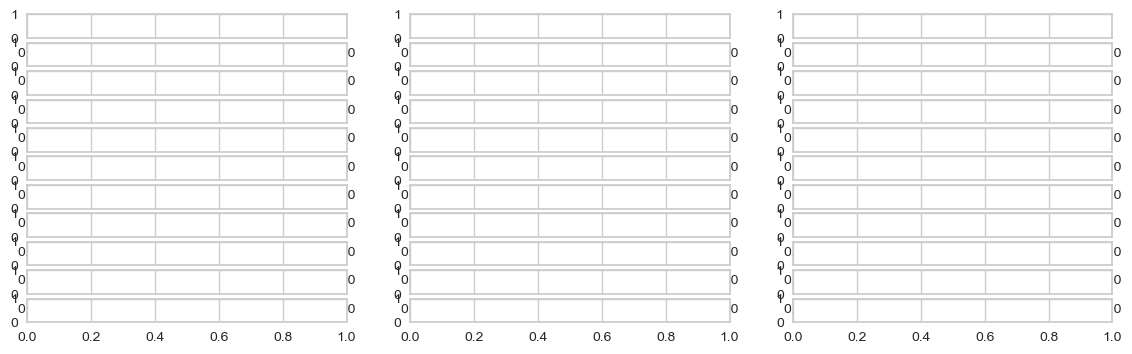

In [222]:
fig, ax = plt.subplots(11,3, figsize=(14,4), dpi=100)

for index, feature in enumerate(['Genre_Action', 'Genre_Adventure', 'Genre_Animation','Genre_Biography','Genre_Comedy','Genre_Crime','Genre_Documentary','Genre_Drama','Genre_Family','Genre_Fantasy','Genre_History','Genre_Horror','Genre_Musical','Genre_Mystery','Genre_Reality-TV','Genre_Romance','Genre_Sci-Fi','Certificates_Approved','Certificates_G','Certificates_M/PG','Certificates_NC-17','Certificates_Not Rated','Certificates_PG','Certificates_PG-13','Certificates_Passed','Certificates_R','Certificates_TV-14','Certificates_TV-G','Certificates_TV-MA','Certificates_TV-PG','Certificates_TV-Y7','Certificates_Unrated','Certificates_X']):
    grouped = labeled_df2[[feature,'cluster']].groupby('cluster').sum()
    grouped.plot(kind='bar', ax=ax[index])
    ax[index].set_xticklabels(grouped.index.tolist(), rotation=0)
plt.show()

### Data Splitting and Training

The dataset was divided into features (X) and target (y) to facilitate the development and evaluation of a predictive model. The target variable is 'Genre', while the features include 'IMDb Rating', 'Year', 'MetaScore', and 'Duration (minutes)'. This separation allows us to train the model on the features (X) to predict the target (y), and subsequently assess its performance in predicting genres based on the provided attributes. Splitting the dataset in this manner helps in building, tuning, and validating the model effectively.

In [494]:
# Features and target variable
features = ['IMDb Rating', 'Year', 'MetaScore', 'Duration (minutes)']
X = df[features]
y = df['Genre']

In [495]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [496]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [497]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [498]:
#Let us see the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (2617, 4), Output: (2617,)
Train Set Size | Input: (2093, 4), Output: (2093,)
Test Set Size | Input: (524, 4), Output: (524,)


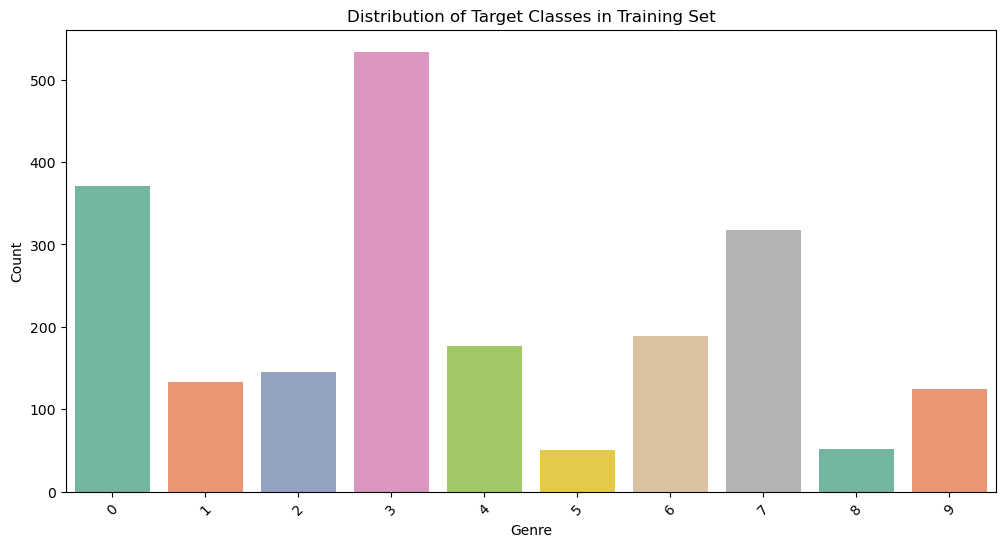

In [500]:
# Visualize the distribution of target classes in the training set
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title('Distribution of Target Classes in Training Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Model Building and Evaluation

The section will cover three key models: **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Logistic Regression.**

#### SVM

SVM aims to find the hyperplane that maximizes the margin between different classes, and can handle non-linearly separable data through the use of kernel functions; it is effective in high-dimensional spaces but computationally intensive.

In [576]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [577]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Score: 0.3363624944330886


In [578]:
# Initialize SVM model with class weights
svm = SVC(class_weight='balanced', kernel='rbf', C=1, random_state=42)  # You can use 'linear', 'rbf', etc.

In [579]:
# Train the model
svm.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

In [607]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [608]:
# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.2748091603053435


In [622]:
# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.16      0.20        93
           1       0.06      0.09      0.07        34
           2       0.12      0.11      0.12        27
           3       0.60      0.37      0.46       145
           4       0.24      0.10      0.14        49
           5       0.05      0.08      0.06        12
           6       0.43      0.61      0.50        46
           7       0.22      0.03      0.05        71
           8       0.07      0.36      0.12        11
           9       0.22      0.81      0.35        36

    accuracy                           0.27       524
   macro avg       0.23      0.27      0.21       524
weighted avg       0.33      0.27      0.27       524



#### INTERPRETATION

The classification report for the SVM model reveals varying performance across different classes. Precision, recall, and F1-score metrics are provided for each class, indicating how well the model predicts each category. For instance, class 3 has the highest precision and recall, demonstrating relatively better performance, while classes 1, 2, and 5 exhibit very low scores, indicating poor performance. The model struggles significantly with classes such as 7 and 5, where recall is extremely low, meaning it fails to identify most instances of these classes. The overall accuracy of the model is 27%, suggesting it correctly classified only a quarter of the instances. The macro average, which treats all classes equally, shows a precision of 0.23, recall of 0.27, and F1-score of 0.21, reflecting the model's balanced performance across all classes. The weighted average, which accounts for the support of each class, indicates a precision of 0.33, recall of 0.27, and F1-score of 0.27, providing a more comprehensive view of the model’s performance considering the frequency of each class. Overall, the SVM model's performance is inconsistent across classes, with a need for further tuning or alternative approaches to enhance classification accuracy.

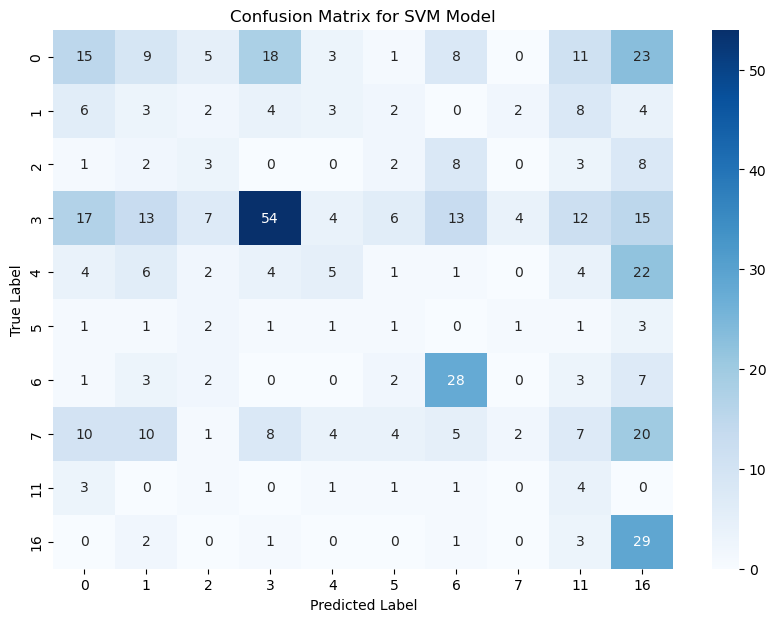

In [584]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

Based on the diagonal values, the model seems to have a decent accuracy for some classes like 3, 6, and 16, but struggles with others like 0, 1, and 2.

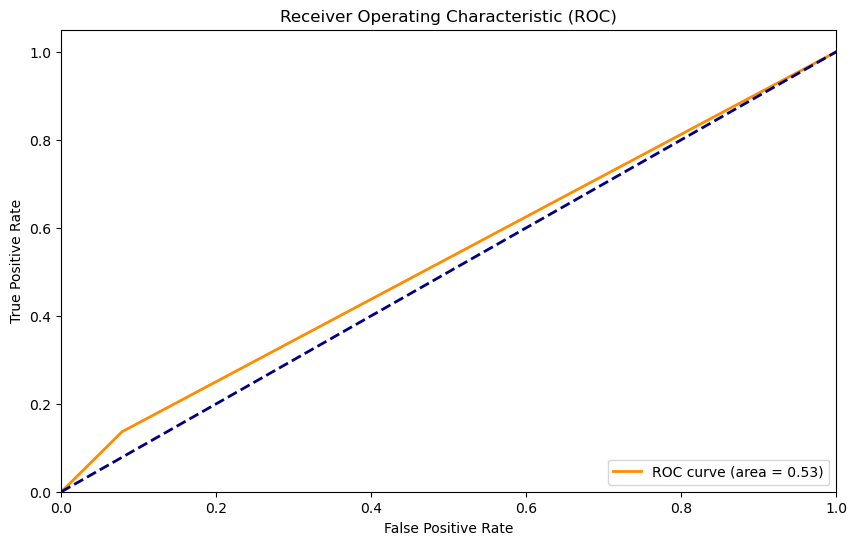

In [585]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve is a straight diagonal line with an area under the curve (AUC) of 0.53. This indicates that the model's performance is only slightly better than random guessing.
The TPR is consistently low, indicating that the model has difficulty correctly identifying positive instances. On the other hand, the FPR is also consistently low, suggesting that the model rarely misclassifies negative instances as positive. Moreover, the AUC is 0.53 which suggests that the model has very limited discriminatory power.

### Logistic Regression

Logistic Regression, a statistical method for binary classification, estimates class probabilities using a logistic function and assumes a linear relationship between features and the log-odds of the target, with regularization techniques available to prevent overfitting.

In [544]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [586]:
# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Define the parameter grid for regularization parameter and penalty
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.31771705244887005


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [587]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(
    C=10,                  # Regularization parameter
    penalty='l2',           # Type of regularization
    random_state=42,        # Seed for reproducibility
    max_iter=1000           # Maximum number of iterations for convergence
)

In [588]:
# Fit the model
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [605]:
# Predict the test set
y_pred_logreg = logistic_regression.predict(X_test)

In [606]:
# Evaluate the model
accuracy_score(y_test, y_pred_logreg)

0.3148854961832061

In [621]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg,zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.03      0.05        93
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        27
           3       0.33      0.84      0.47       145
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        12
           6       0.48      0.61      0.54        46
           7       0.21      0.17      0.19        71
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        36

    accuracy                           0.31       524
   macro avg       0.11      0.17      0.12       524
weighted avg       0.18      0.31      0.21       524



#### INTERPRETATION

The classification report for the model indicates its performance across multiple classes, highlighting a varied ability to predict each category. For class 3, the model shows the strongest performance with a precision of 0.33, recall of 0.84, and an F1-score of 0.47, suggesting it effectively identifies instances of this class. However, for classes 0, 1, 2, 4, 5, 8, and 9, the model performs poorly, with precision, recall, and F1-scores often at zero, meaning it fails to correctly identify or classify instances in these categories. Class 6 shows moderate performance with a precision of 0.48, recall of 0.61, and an F1-score of 0.54. The overall accuracy of the model is 31%, indicating that it correctly classified 31% of the total instances. The macro average, which provides an unweighted average of performance metrics across all classes, shows a precision of 0.11, recall of 0.17, and an F1-score of 0.12. The weighted average, which considers the number of instances per class, reveals a precision of 0.18, recall of 0.31, and an F1-score of 0.21. These results suggest that while the model performs reasonably well for some classes, it struggles significantly with others, and overall performance remains low, indicating a need for further improvement or re-evaluation.

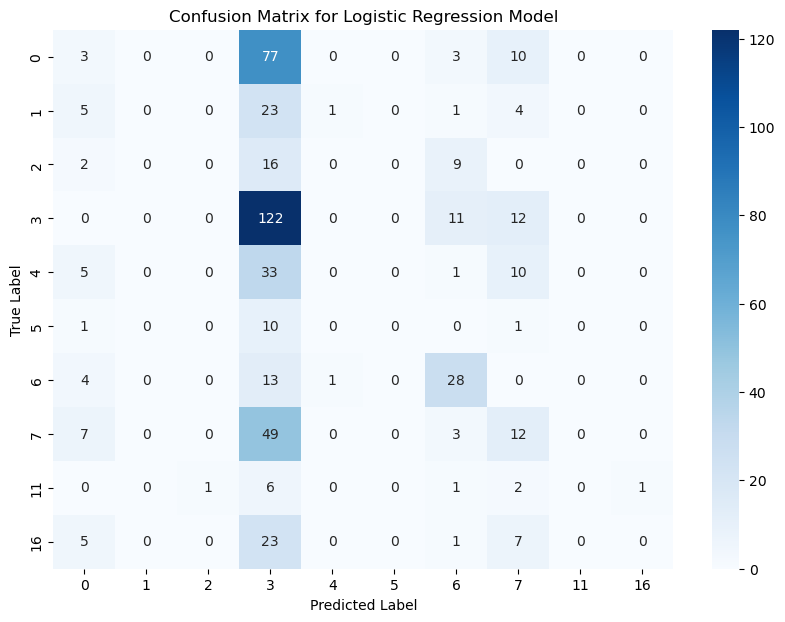

In [592]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes. 

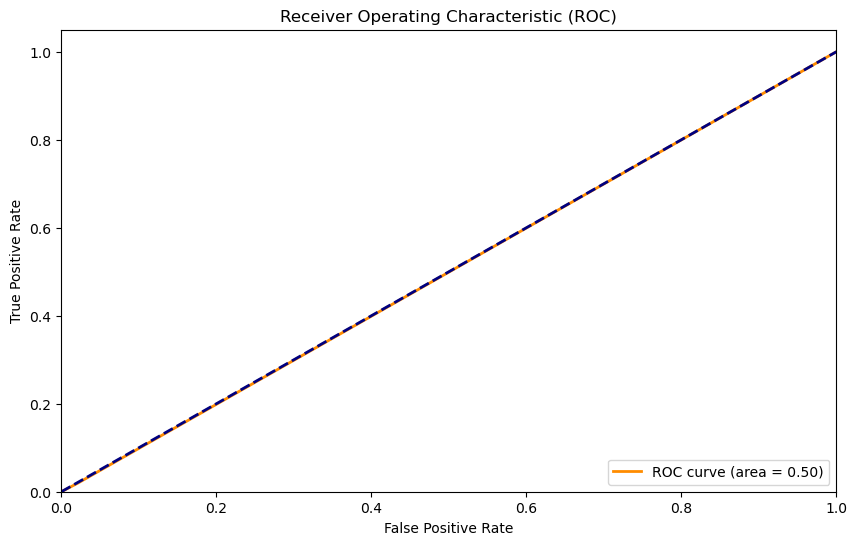

In [593]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve is a straight diagonal line, which is characteristic of a random classifier. This means the model's predictions are essentially equivalent to random guessing. The AUC is 0.50, which confirms the model's poor performance. An AUC of 0.5 indicates a model that is no better than random chance.

### KNN Classifier

KNN is a simple, instance-based learning algorithm where the class of a data point is determined by the majority class among its k nearest neighbors, with performance dependent on the choice of distance metric and the number of neighbors. 

In [595]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [553]:
# Ensure n_neighbors is valid
n_neighbors = min(20, len(X_train))  # Set n_neighbors to a valid number
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [554]:
# Train the kNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [603]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test)

In [604]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.25      0.23        93
           1       0.00      0.00      0.00        34
           2       0.13      0.07      0.10        27
           3       0.44      0.72      0.54       145
           4       0.20      0.10      0.14        49
           5       0.00      0.00      0.00        12
           6       0.54      0.54      0.54        46
           7       0.25      0.18      0.21        71
           8       0.00      0.00      0.00        11
           9       0.26      0.28      0.27        36

    accuracy                           0.35       524
   macro avg       0.20      0.21      0.20       524
weighted avg       0.28      0.35      0.30       524



#### INTERPRETATION

The classification report for the model shows varying performance across different classes. For class 3, the model performs best with a precision of 0.44, recall of 0.72, and an F1-score of 0.54, indicating a relatively strong ability to identify and classify instances of this class. Class 6 also shows good performance with an equal precision, recall, and F1-score of 0.54, suggesting consistent identification of this class. However, the model struggles with classes 1, 2, 4, 5, 8, and 9, where precision, recall, and F1-scores are notably lower, with some classes having a precision, recall, and F1-score of zero, indicating poor performance. The overall accuracy of the model is 35%, meaning it correctly classified 35% of the instances. The macro average, which provides an unweighted average of performance metrics across all classes, shows a precision of 0.20, recall of 0.21, and an F1-score of 0.20. The weighted average, which considers the support of each class, shows a precision of 0.28, recall of 0.35, and an F1-score of 0.30. These metrics suggest that while the model has some strengths in identifying certain classes, it generally exhibits lower overall performance and may benefit from further refinement to improve its classification across all classes.

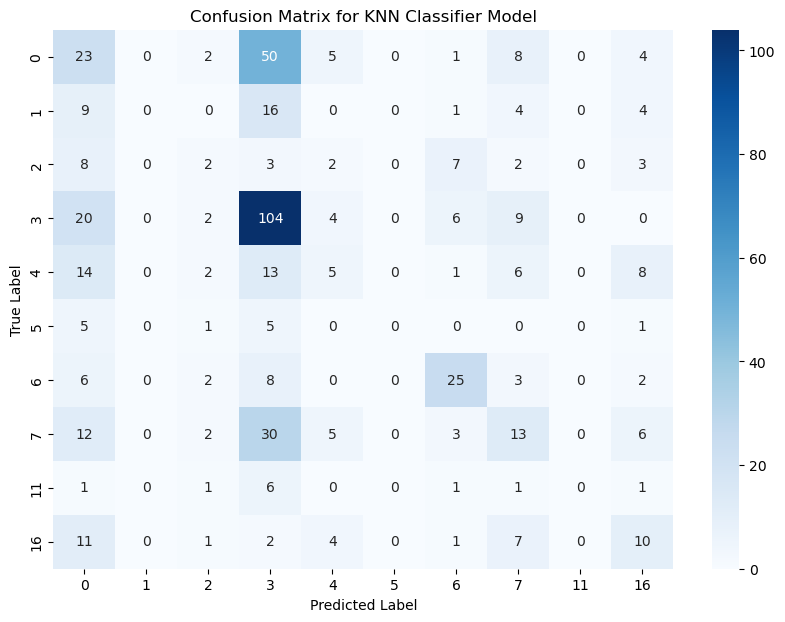

In [557]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

The diagonal elements (top-left to bottom-right) represent correct predictions. There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes.

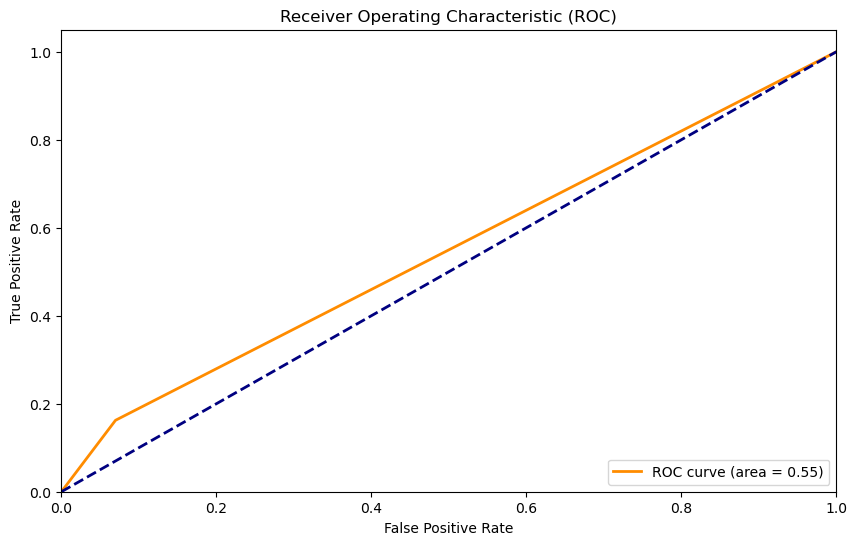

In [558]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve closely resembles a diagonal line, which is characteristic of a random classifier. This means the model's predictions are essentially equivalent to random guessing. The AUC is 0.55, which is very close to 0.5. An AUC of 0.5 indicates a model that is no better than random chance.

#### Training KNN Classifier with different k values

In [522]:
# List of k values to test
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

In [523]:
# Test k values
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

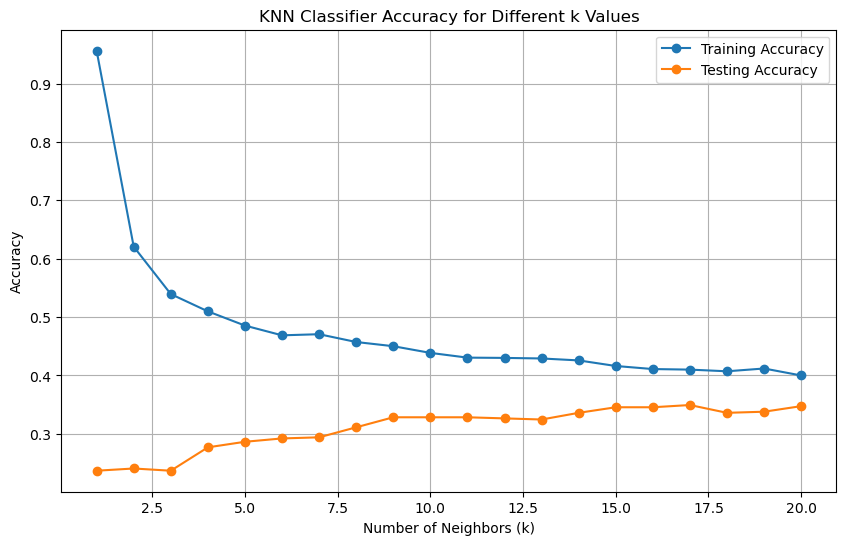

In [524]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [599]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a list of k values to experiment with
k_values = [3, 5, 7, 9, 10, 12]

# Perform cross-validation for each value of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    print(f"Average accuracy for k={k}: {np.mean(scores)}")

Average accuracy for k=3: 0.262307156478743
Average accuracy for k=5: 0.2928880565484008
Average accuracy for k=7: 0.30675337725959506
Average accuracy for k=9: 0.3120039739183063
Average accuracy for k=10: 0.311524363088237
Average accuracy for k=12: 0.31008553059802907


### MODEL COMPARISON

In [630]:
# Generate classification reports
report_svm = classification_report(y_test, y_pred_svm, zero_division=0, output_dict=True)
report_logreg = classification_report(y_test, y_pred_logreg, zero_division=0, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, zero_division=0, output_dict=True)

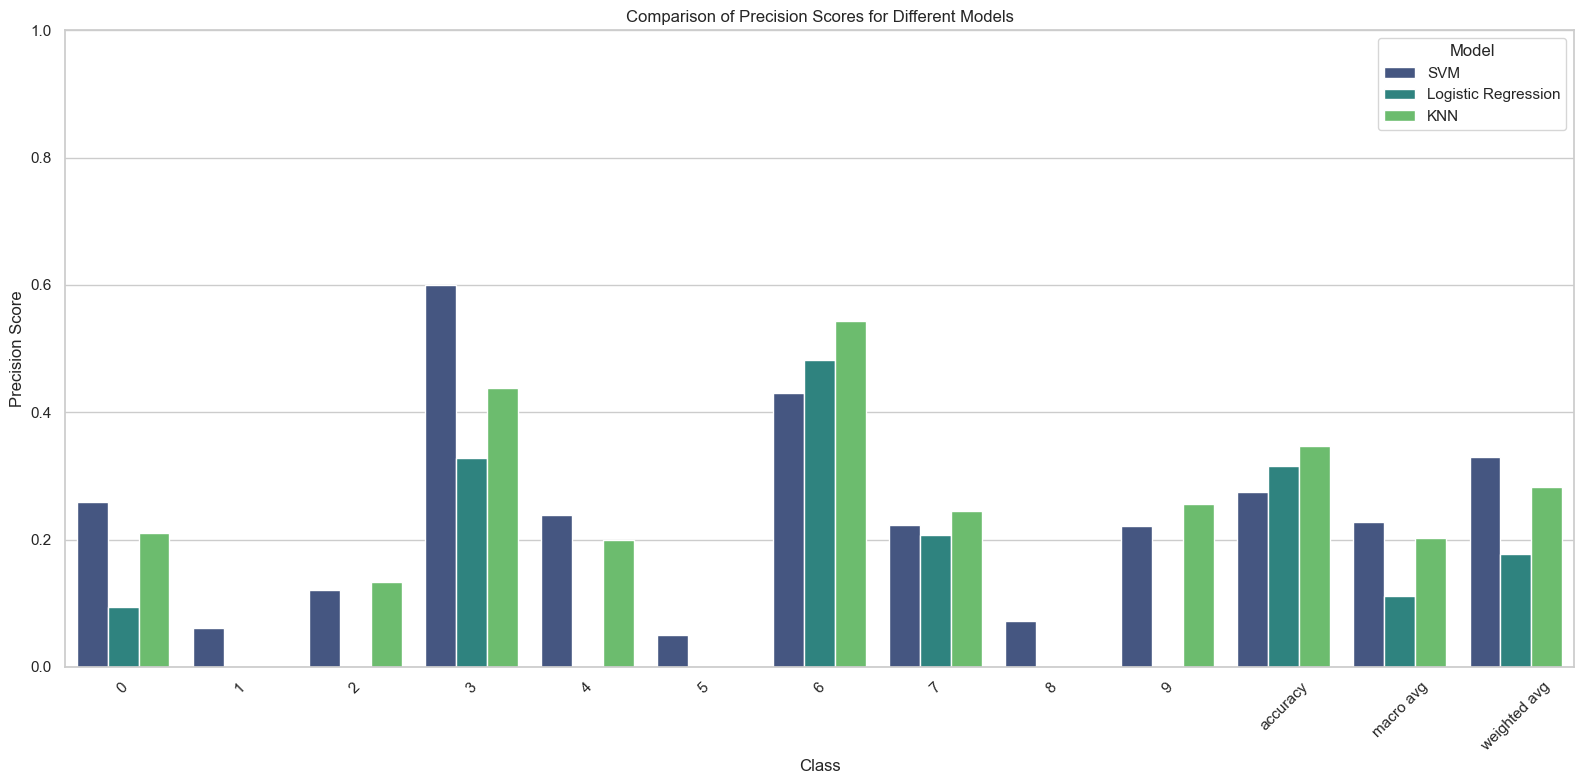

In [637]:
# Convert reports to DataFrames
def precision_to_df(report, model_name):
    # Extract only precision for each class and convert to DataFrame
    precision_df = pd.DataFrame(report).transpose()[['precision']]
    precision_df['Model'] = model_name
    precision_df = precision_df.reset_index().rename(columns={'index': 'Class', 'precision': 'Precision'})
    return precision_df

df_svm = precision_to_df(report_svm, 'SVM')
df_logreg = precision_to_df(report_logreg, 'Logistic Regression')
df_knn = precision_to_df(report_knn, 'KNN')

# Combine DataFrames
df_combined = pd.concat([df_svm, df_logreg, df_knn])

# Set plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(16, 8))

# Plot Precision for each class across models
sns.barplot(x='Class', y='Precision', hue='Model', data=df_combined, palette='viridis')

# Add titles and labels
plt.title('Comparison of Precision Scores for Different Models')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.legend(title='Model')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### INTERPRETATION

The comparative analysis of the three models reveals differing levels of performance. The SVM model, with an accuracy of 27%, shows a mixed performance. The macro average metrics, with precision of 0.23, recall of 0.27, and F1-score of 0.21, suggest a relatively low ability to classify instances correctly across all classes. However, the weighted averages, precision of 0.33, recall of 0.27, and F1-score of 0.27, indicate slightly better performance when considering the support of each class. Overall, the SVM model performs unevenly across different classes, with some categories achieving better results than others.

On the other hand, the Logistic Regression Model, yielded zero scores for several classesbut shows an overall accuracy of 31%. Despite this improvement in accuracy compared to the SVM model, the macro average metrics—precision of 0.11, recall of 0.17, and F1-score of 0.12 remain low, thus, highlighting poor performance across most classes. The weighted averages, precision of 0.18, recall of 0.31, and F1-score of 0.21, reflect better performance when accounting for class support, but the results still indicate suboptimal classification.

In contrast, the current model achieves the highest overall accuracy at 35%. The macro average metrics, precision of 0.20, recall of 0.21, and F1-score of 0.20, show improved performance compared to the previous models, though they remain relatively low. The weighted averages, precision of 0.28, recall of 0.35, and F1-score of 0.30, demonstrate better handling of class imbalances and higher class-specific performance. This model represents an improvement in accuracy and performance metrics, indicating a better capability to classify instances correctly, though further tuning and refinement are still necessary to enhance performance across all classes.

The average accuracy for the KNN classifier with k=9 is 0.312. This indicates that the best performance for the KNN model is achieved with k=9.